<a href="https://colab.research.google.com/github/MelsonHeo00/Summer_MicroCredential/blob/main/In_Class_Lab_Assignment_7_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the problem

Given the link to the dataset ["https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data&quot;], conduct a detailed and conclusive analysis.


The notebook MUST INCLUDE:
   * All steps necessary from the template.
   * At least 5 Data Visualizations studying the data and explanation of the graph/plot chosen.
   * A well written explanation of every model used and parameters employed.
   * A Logistic Regression Model with a least 2-3 data splits rates and explanation of the accuracy of each model.
   * A KNN Analytic model with a least 2-3 data splits rates and explanation of the accuracy of each model.  And code analysis for    choosing a 'k' value.

   * BONUS:
      * An SVC Model with a least 2-3 data splits rates and explanation of the accuracy of each model.
      * SVC explanation... (https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989)

# Task 2: Load Libraries

Comment: This section imports all of the necessary libraries 

In [59]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
sns.set()

# Task 3: Load the Data

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/MelsonHeo00/ML-Data/main/iris.csv')
# The variable df will read whatever is witin the link, this will be the data that I will be working on

# Task 4: EDA (Exploratory Data Analysis)

In [61]:
df.head()
# Checks to see if the data is loaded up

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [62]:
df.describe()
# Checks for the statistics of the data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
df.info()
# Checks the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [64]:
df.isnull().value_counts()
# Checks to see if there is any null data, if there is any null data, it has to be changed

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Class
False         False        False         False        False    150
dtype: int64

In [65]:
df.isnull()
# Checks to see if there is any null data, if there is any null data, it has to be changed

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [66]:
df.columns
# Checking the columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

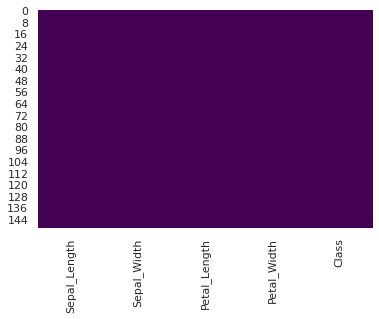

In [67]:
sns.heatmap(df.isnull(), cbar = False,cmap = 'viridis')
# Checks to see if there is any null data, if there is any null data, it has to be changed

# Task 5: Data Visualization

[Text(0, 0, '4.3'),
 Text(0, 0, '4.4'),
 Text(0, 0, '4.5'),
 Text(0, 0, '4.6'),
 Text(0, 0, '4.7'),
 Text(0, 0, '4.8'),
 Text(0, 0, '4.9'),
 Text(0, 0, '5.0'),
 Text(0, 0, '5.1'),
 Text(0, 0, '5.2'),
 Text(0, 0, '5.3'),
 Text(0, 0, '5.4'),
 Text(0, 0, '5.5'),
 Text(0, 0, '5.6'),
 Text(0, 0, '5.7'),
 Text(0, 0, '5.8'),
 Text(0, 0, '5.9'),
 Text(0, 0, '6.0'),
 Text(0, 0, '6.1'),
 Text(0, 0, '6.2'),
 Text(0, 0, '6.3'),
 Text(0, 0, '6.4'),
 Text(0, 0, '6.5'),
 Text(0, 0, '6.6'),
 Text(0, 0, '6.7'),
 Text(0, 0, '6.8'),
 Text(0, 0, '6.9'),
 Text(0, 0, '7.0'),
 Text(0, 0, '7.1'),
 Text(0, 0, '7.2'),
 Text(0, 0, '7.3'),
 Text(0, 0, '7.4'),
 Text(0, 0, '7.6'),
 Text(0, 0, '7.7'),
 Text(0, 0, '7.9')]

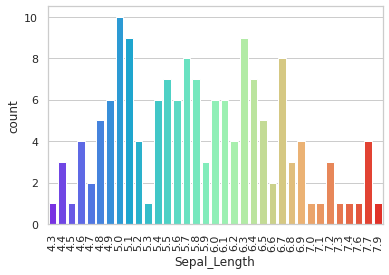

In [68]:
sns.set_style('whitegrid')
ax = sns.countplot(x = 'Sepal_Length', data = df, palette = "rainbow")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
# Graphs all of the values that is under Sepal_Length column
# I rotated the x axis to 90 degrees for a better visualization
# I used this plot to check the values for each of the sepal length

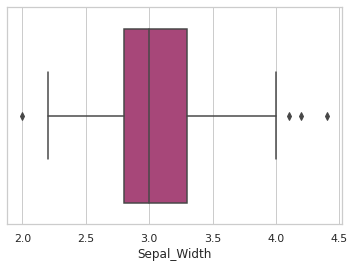

In [69]:
sns.boxplot(x = 'Sepal_Width', data = df, palette = 'magma')
# Box plot for the column Sepal_Width within the data
# I used this box plot to check for the values of Sepal Width

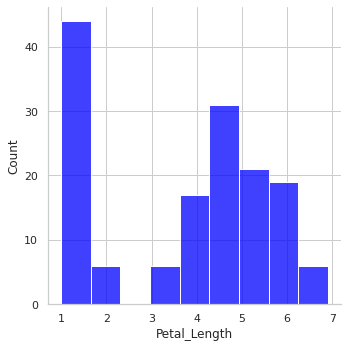

In [70]:
sns.displot(x = 'Petal_Length', data = df, color = 'blue')
# Dis plot for the column Petal_Length within the data
# I used this plot to check the values for each of the petal_length

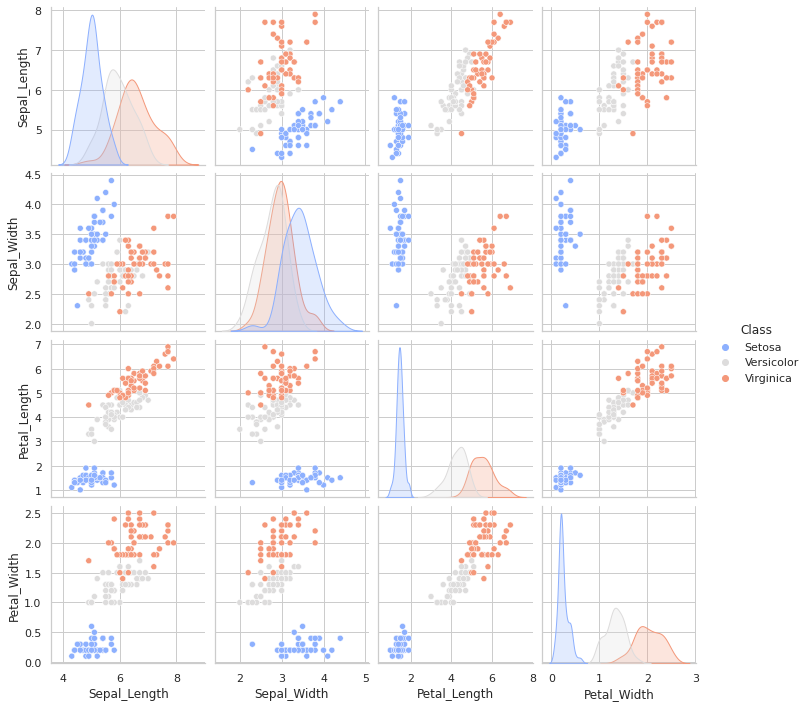

In [71]:
sns.pairplot(df, hue = 'Class', palette = "coolwarm")
# Pairplot for the hue as class within the data
# I used pair plot to see the relations between the class and each of the columns

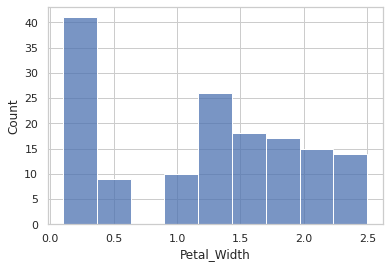

In [72]:
sns.histplot(x = 'Petal_Width', data = df, palette = 'cubehelix')
# Histplot for the column Petal_Width within the data
# This is a good way for me to measure each values for petal width

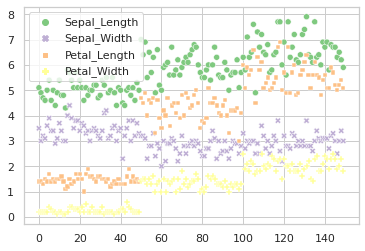

In [73]:
sns.scatterplot( data = df, palette = 'Accent')
# Scatterplot for all of the columns beside class
# I used this scatter plot to check where each points lie for each columns

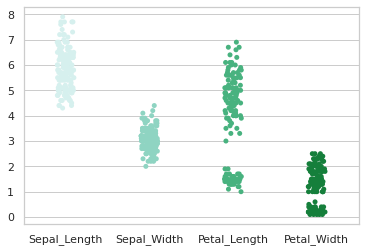

In [74]:
sns.stripplot(data = df, palette = 'BuGn')
# Stripplot for all of the columns beside class
# I used this strip plot to visualize each of the points how close it is from each other

# Task 6: Compute the Cost Function

In [75]:
# This analysis is not needed

# Task 7: Compute the Gradient Descent

In [76]:
# This analysis is not needed

# Task 8: Visualizing the Cost Function

In [77]:
# This analysis is not needed

# Task 9 and 10: Conduct the logistic regression on the data and Making Predictions

In [78]:
df['Class'] = df['Class'].replace(['Setosa'],'1')
df['Class'] = df['Class'].replace(['Versicolor'],'2')
df['Class'] = df['Class'].replace(['Virginica'],'3')
df.head()
# Data being converted from string to variable because machines can't read words :(

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [79]:
df.tail()
# To check if the data is correct from the end as well

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3
149,5.9,3.0,5.1,1.8,3


## First Analysis

In [80]:
# Analysis: In this first analysis, I chose to make the test size half of the data and making the random state equal to 1. 
# With this analysis, I am able to test out the random state along with half of the data to see how accurate this model is

Part 1: Train Test Split

In [81]:
from sklearn.model_selection import train_test_split
# Importing the train_test_split

In [82]:
X = df.iloc[:, [0,3]].values # Acquring the values for X
y = df.iloc[:, -1].values # Acquring the values for Y, which in this case is Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 1)

Part 2: Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Fitting the data

LogisticRegression(random_state=0)

Part 3: Making Predictions

In [84]:
predictions = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
# Outputting the classification report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.96      0.96      0.96        24
           3       0.96      0.96      0.96        27

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



In [85]:
confusion_matrix(y_test, predictions)

array([[24,  0,  0],
       [ 0, 23,  1],
       [ 0,  1, 26]])

In [86]:
print('Prediction Accuracy: ', classifier.score(X_test,y_test))
pp = classifier.predict(X_test)
plist = pp.tolist()

print("Setosa:", plist.count('1'))
print("Versicolor:", plist.count('2'))
print("Virginica:", plist.count('3'))
# This section here checks for the prediction for each of the class 

Prediction Accuracy:  0.9733333333333334
Setosa: 24
Versicolor: 24
Virginica: 27


## Second Analysis

In [87]:
# Combining part 1, 2 and 3 from the previous analysis, I chose to decrease the test size and change the random state to 0 this time.
# With this part, I chose to not use random state this time because I want to see how randomness will affect the model in addition with a smaller sample test pool

X = df.iloc[:, [0,3]].values # Acquring the values for X
y = df.iloc[:, -1].values # Acquring the values for Y, which in this case is Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # Train_test_split declaration

# Classification and Fitting
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predictions
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions)) # outputting the classification output

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.93      1.00      0.96        13
           3       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [88]:
confusion_matrix(y_test, predictions)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [89]:
print('Prediction Accuracy: ', classifier.score(X_test,y_test))
pp = classifier.predict(X_test)
plist = pp.tolist()


print("Setosa:", plist.count('1'))
print("Versicolor:", plist.count('2'))
print("Virginica:", plist.count('3'))
# This section here checks for the prediction for each of the class 

Prediction Accuracy:  0.9666666666666667
Setosa: 11
Versicolor: 14
Virginica: 5


# Task 11: KNN

In [90]:
# This section here scales the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class', axis = 1)) # Drops the class column to fit the data
scaled_features = scaler.transform(df.drop('Class', axis = 1))
scaled_features

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [91]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1]) # Fitting the data 

In [92]:
df_feat.head() # Outputting the data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [93]:
# This section here is where KNeighborsClassifier is being declared, we start with knn = 1 for now to see how things are going
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Class'], test_size = 0.33, random_state = 42)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]


In [95]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.93      0.93      0.93        15
           3       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [96]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.00 %
Standard Deviation: 12.69 %


In [97]:
error_rate = [] # Error rate as an empty list

# Within the for loop, the error rate will be filled
for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test)) # Adds a number to the list if the prediction number is not equal to the y_test

In [98]:
error_rate # Outputs the list

[0.04,
 0.04,
 0.02,
 0.04,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.02,
 0.04,
 0.02,
 0.06,
 0.06,
 0.06,
 0.1,
 0.08,
 0.1,
 0.1,
 0.1,
 0.12,
 0.12,
 0.1,
 0.1,
 0.1,
 0.12,
 0.12,
 0.12,
 0.1,
 0.14]

Text(0, 0.5, 'Error Rate')

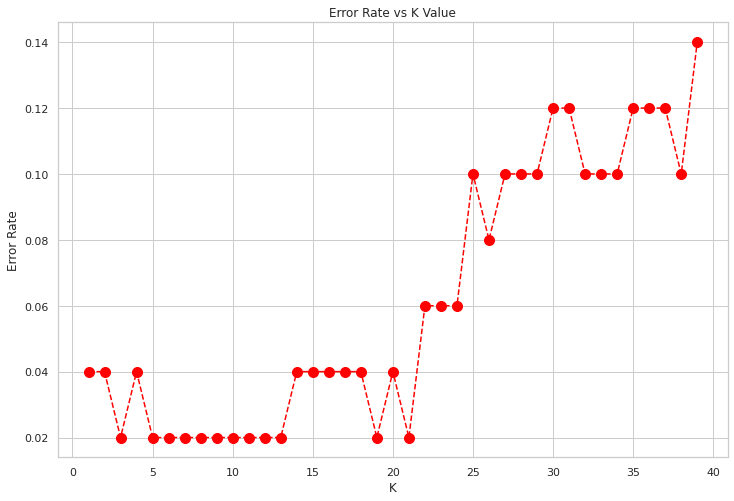

In [99]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 40), error_rate, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# Ouptuts the graph between Error Rate and K Value

In [100]:
# From the graph, we can note that the closest lowest error rates are within 5 to 12 so we will use k = any of the lowest error rates

In [101]:
# First part: knn = 5
# Analyis: Similar to the first analysis, I chose 11 because it is near the highest number of the lowest error rate
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 5')
print(confusion_matrix(y_test, pred))

With k = 5
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [102]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.94      1.00      0.97        15
           3       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [103]:
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
# Checks for the accuracy and standard deviation for each of the knn

Accuracy: 93.00 %
Standard Deviation: 7.81 %


In [104]:
# Second part: knn = 11
# Analyis: Similar to the first analysis, I chose 11 because it is near the highest number of the lowest error rate
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 11')
print(confusion_matrix(y_test, pred))

With k = 11
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [105]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.94      1.00      0.97        15
           3       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [106]:
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
# Checks for the accuracy and standard deviation for each of the knn

Accuracy: 92.00 %
Standard Deviation: 10.77 %


In [107]:
# Analysis results for 1 and 2:
# The report has shown that the precision is equal to 1.0. The reason for this result is because of how the data is very close to each other.
# With the points being very close to each other, it ends up being 0.98 as the avg for all of the three classes.

In [108]:
# Third part: I will be using any n to see how the matrix alters so knn = 32
# Analysis: I chose this number because this number is around when the error rate starts to get high, so I chose this number to test out how the classification report would look like
knn = KNeighborsClassifier(n_neighbors = 32)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 32')
print(confusion_matrix(y_test, pred))

With k = 32
[[19  0  0]
 [ 0 14  1]
 [ 0  4 12]]


In [109]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.78      0.93      0.85        15
           3       0.92      0.75      0.83        16

    accuracy                           0.90        50
   macro avg       0.90      0.89      0.89        50
weighted avg       0.91      0.90      0.90        50



In [110]:
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
# Checks for the accuracy and standard deviation for each of the knn

Accuracy: 86.00 %
Standard Deviation: 9.17 %


In [111]:
# Analysis for 3:
# The average has gone down for the report. This can be due to the high number of knn which is 32.

# Task 12: Bonus SVM 

In [112]:
from sklearn.svm import SVC

In [120]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
clf = SVC(kernel = 'linear', random_state = 0)
clf.fit(X, y)

SVC(kernel='linear', random_state=0)

In [ ]:
# I got tired, Im sorry :)